용어에 대한 공지

모듈?
패키지?
라이브러리?

정확히 구분이 가능합니다.

다만, 비현코 클래스에서는

모듈/패키지/라이브러리 라는 단어는 그냥 하나의 코드모음이라고 생각하시고 혼용해서 쓰도록 하겠습니다.

좀더 자세한 구분을 알고 싶으시다면 아래링크를 참조해주세요

https://wikidocs.net/27

# 시각화 패키지 seaborn & matplotlib

## 활용코드예시1

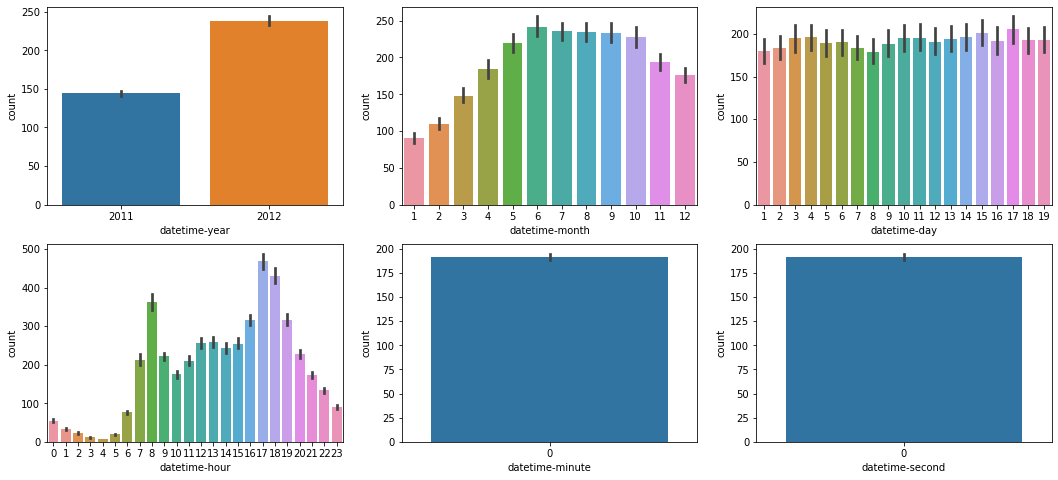

In [1]:
#kaggle 이라는 데이터 분석 대회사이트에서 가져온 데이터를 가지고 활용한 예시입니다.
# pandas와 matplotlib 을 활용해서 
import seaborn as sns
import pandas as pd
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train["datetime"] = pd.to_datetime(train["datetime"])
train["datetime-year"] = train["datetime"].dt.year
train["datetime-month"] = train["datetime"].dt.month
train["datetime-day"] = train["datetime"].dt.day
train["datetime-hour"] = train["datetime"].dt.hour
train["datetime-minute"] = train["datetime"].dt.minute
train["datetime-second"] = train["datetime"].dt.second

train[["datetime", "datetime-year", "datetime-month", "datetime-day", "datetime-hour", "datetime-minute", "datetime-second"]].head()

test["datetime"] = pd.to_datetime(test["datetime"])

test["datetime-year"] = test["datetime"].dt.year
test["datetime-month"] = test["datetime"].dt.month
test["datetime-day"] = test["datetime"].dt.day
test["datetime-hour"] = test["datetime"].dt.hour
test["datetime-minute"] = test["datetime"].dt.minute
test["datetime-second"] = test["datetime"].dt.second

test[["datetime", "datetime-year", "datetime-month", "datetime-day", "datetime-hour", "datetime-minute", "datetime-second"]].head()

import matplotlib.pyplot as plt

figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18, 8)

sns.barplot(data=train, x="datetime-year", y="count", ax=ax1)
sns.barplot(data=train, x="datetime-month", y="count", ax=ax2)
sns.barplot(data=train, x="datetime-day", y="count", ax=ax3)
sns.barplot(data=train, x="datetime-hour", y="count", ax=ax4)
sns.barplot(data=train, x="datetime-minute", y="count", ax=ax5)
sns.barplot(data=train, x="datetime-second", y="count", ax=ax6)

##  활용코드예시2

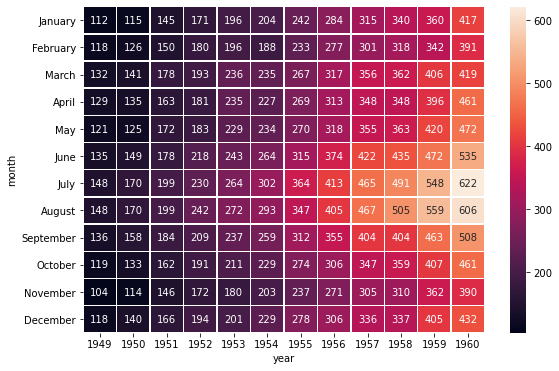

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set_theme()

# Load the example flights dataset and convert to long-form
flights_long = sns.load_dataset("flights")
flights = flights_long.pivot("month", "year", "passengers")

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, ax=ax)

# 데이터 관리 라이브러리pandas

In [3]:
import pandas as pd

df = pd.DataFrame({'month': [1, 4, 7, 10],
                   'year': [2012, 2014, 2013, 2014],
                   'sale': [55, 40, 84, 31]})
df

,month,year,sale
0,1,2012,55
1,4,2014,40
2,7,2013,84
3,10,2014,31


In [4]:
df2 = pd.DataFrame({'month': [3, 5, 11, 10],
                   'year': [2015, 2016, 2017, 2018],
                   'sale': [12, 20, 34, 41]})

df2

,month,year,sale
0,3,2015,12
1,5,2016,20
2,11,2017,34
3,10,2018,41


In [5]:
df.transpose()

,0,1,2,3
month,1,4,7,10
year,2012,2014,2013,2014
sale,55,40,84,31


In [6]:
pd.concat([df,df2])

,month,year,sale
0,1,2012,55
1,4,2014,40
2,7,2013,84
3,10,2014,31
0,3,2015,12
1,5,2016,20
2,11,2017,34
3,10,2018,41


In [7]:
df = df.transpose()
df2 = df2.transpose()
pd.concat([df,df2])

,0,1,2,3
month,1,4,7,10
year,2012,2014,2013,2014
sale,55,40,84,31
month,3,5,11,10
year,2015,2016,2017,2018
sale,12,20,34,41


# 이미지 글씨 체크 pytesseract

In [8]:
from IPython.display import Image

#### 참고 - https://www.youtube.com/watch?v=rNxMwtottmM&t=87s
#### 사전 설정을 진행하고, 아래코드를 진행해야 합니다.

#### 1단계 
- tesseract-ocr.github.io/tessdoc/Home.html  접속
- https://github.com/UB-Mannheim/tesseract/wiki (윈도우 사용자)
- (맥사용자는 각자의 경로에서 확인가능)

#### 2단계 - 설치파일 다운로드

- tesseract-ocr-w32-setup-v5.0.0-alpha.20201127.exe (32 bit) 
- tesseract-ocr-w64-setup-v5.0.0-alpha.20201127.exe (64 bit)


#### 3단계 - 설치

- 설치시 주의사항
- 한국어 추가필수
![title](pytesseract.jpg)

In [9]:
!pip install pytesseract
import pyautogui as pag
import pytesseract as pyt
import PIL
from PIL import Image

You should consider upgrading via the 'c:\users\asus\anaconda3\python.exe -m pip install --upgrade pip' command.


In [10]:
#실행파일 경로실적
pyt.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

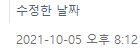

In [11]:
pag.screenshot('picture.png', region=(610,100, 140, 50))

In [12]:
text1 = pyt.image_to_string(Image.open('picture.png'), lang="kor")
print(text1)

게
[개

자

12021-10-05 오후 812



# 영상 편집 moviepy

In [1]:
!pip install moviepy
IMAGEMAGICK_BINARY = "C:\\Program Files\\ImageMagick_VERSION\\magick.exe"
from moviepy.editor import *

clip1 = VideoFileClip("myvideo.mp4")
clip2 = VideoFileClip("myvideo2.mp4").subclip(3.6)
clip3 = VideoFileClip("myvideo3.mp4")
final_clip = concatenate_videoclips([clip1,clip2,clip3])
final_clip.write_videofile("my_concatenation.mp4")

You should consider upgrading via the 'c:\users\asus\anaconda3\python.exe -m pip install --upgrade pip' command.
chunk:   0%|                                                                         | 0/450 [00:00<?, ?it/s, now=None]

Moviepy - Building video my_concatenation.mp4.
MoviePy - Writing audio in my_concatenationTEMP_MPY_wvf_snd.mp3


t:   0%|                                                                    | 2/1223 [00:00<01:22, 14.85it/s, now=None]

MoviePy - Done.
Moviepy - Writing video my_concatenation.mp4



Moviepy - Done !
Moviepy - video ready my_concatenation.mp4
